## Exploratory visualizations of COVID-19 Italian dataset

Uses official data from Italy's Protezione Civile (repo: https://github.com/pcm-dpc/COVID-19)

TODO: request or create annotations for point-in-time events that are necessary to make sense of changes in the data (e.g. start of lockdown period, change in screening practices).

In [193]:
import requests
import pandas as pd
from json import loads

# Pull data
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json'
json = loads(requests.get(url).content)
data = pd.json_normalize(json)

# Clean up and set data types
data['data'] = data['data'].astype('datetime64[ns]')

data


,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24 18:00:00,ITA,101,26,127,94,221,221,1,7,229,4324
1,2020-02-25 18:00:00,ITA,114,35,150,162,311,90,1,10,322,8623
2,2020-02-26 18:00:00,ITA,128,36,164,221,385,74,3,12,400,9587
3,2020-02-27 18:00:00,ITA,248,56,304,284,588,203,45,17,650,12014
4,2020-02-28 18:00:00,ITA,345,64,409,412,821,233,46,21,888,15695
5,2020-02-29 18:00:00,ITA,401,105,506,543,1049,228,50,29,1128,18661
6,2020-03-01 18:00:00,ITA,639,140,779,798,1577,528,83,34,1694,21127
7,2020-03-02 18:00:00,ITA,742,166,908,927,1835,258,149,52,2036,23345
8,2020-03-03 18:00:00,ITA,1034,229,1263,1000,2263,428,160,79,2502,25856
9,2020-03-04 18:00:00,ITA,1346,295,1641,1065,2706,443,276,107,3089,29837


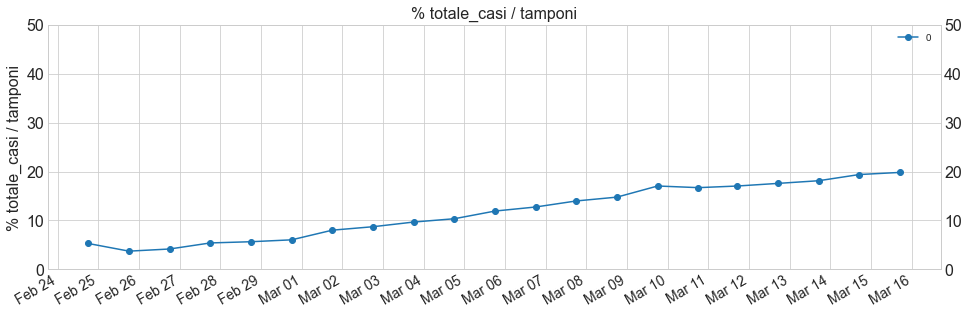

In [199]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(figsize=(16,5))
pcnt = data.totale_casi / data.tamponi * 100
data2 = pd.concat([data.data, pcnt], axis=1)
data2.plot(ax=ax, x='data', style='-o', fontsize=14, ylim=(0,50))

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.tick_params(axis='y', which='both', labelleft=True, labelright=True, labelsize=16)
plt.xlabel('')
plt.ylabel('% totale_casi / tamponi', fontsize=16)
plt.title('% totale_casi / tamponi', fontsize=16)
plt.legend();


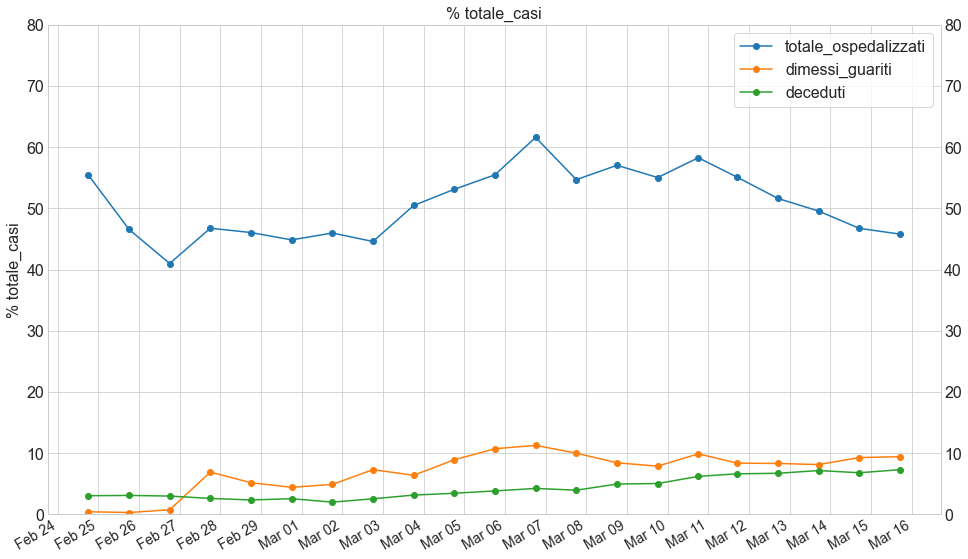

In [198]:
fig, ax = plt.subplots(figsize=(16,10))
pcnt2 = data.drop(['data', 'stato', 'isolamento_domiciliare', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_attualmente_positivi', 'nuovi_attualmente_positivi', 'totale_casi', 'tamponi'], axis=1)
pcnt2 = pcnt2.div(data.totale_casi / 100, axis=0)

data3 = pd.concat([data.data, pcnt2], axis=1)

data3.plot(ax=ax, x='data', style='-o', fontsize=14, yticks=range(0,81,10), ylim=(0,80))

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.tick_params(axis='y', which='both', labelleft=True, labelright=True, labelsize=16)
plt.xlabel('')
plt.ylabel('% totale_casi', fontsize=16)
plt.title('% totale_casi', fontsize=16)
plt.legend(fontsize=16, frameon=True);


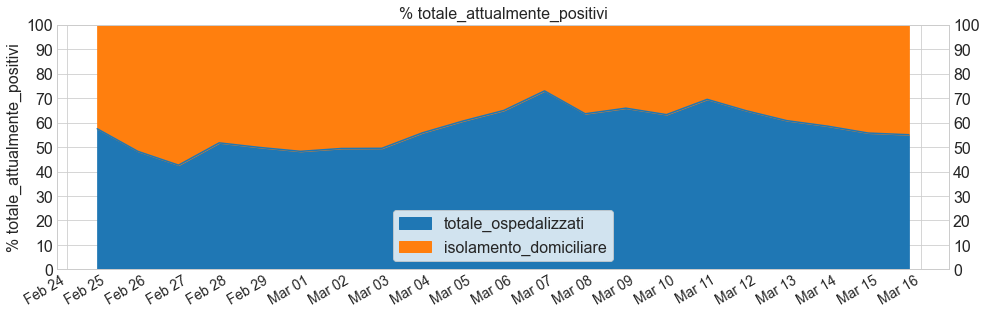

In [196]:
fig, ax = plt.subplots(figsize=(16,5))
pcnt3 = pd.concat([data.totale_ospedalizzati, data.isolamento_domiciliare], axis=1)
pcnt3 = pcnt3.div(data.totale_attualmente_positivi / 100, axis=0)

data4 = pd.concat([data.data, pcnt3], axis=1)

data4.plot(ax=ax, kind='area', stacked=True, x='data', fontsize=14, yticks=range(0,101,10), ylim=(0,100))

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.tick_params(axis='y', which='both', labelleft=True, labelright=True, labelsize=16)
plt.xlabel('')
plt.ylabel('% totale_attualmente_positivi', fontsize=16)
plt.title('% totale_attualmente_positivi', fontsize=16)
plt.legend(loc='lower center', fontsize=16, frameon=True);

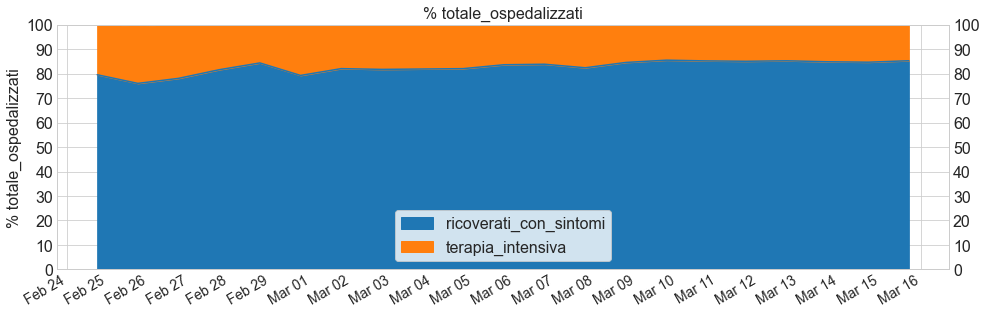

In [197]:
fig, ax = plt.subplots(figsize=(16,5))
pcnt4 = pd.concat([data.ricoverati_con_sintomi, data.terapia_intensiva], axis=1)
pcnt4 = pcnt4.div(data.totale_ospedalizzati / 100, axis=0)

data5 = pd.concat([data.data, pcnt4], axis=1)

data5.plot(ax=ax, kind='area', stacked=True, x='data', fontsize=14, yticks=range(0,101,10), ylim=(0,100))

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.tick_params(axis='y', which='both', labelleft=True, labelright=True, labelsize=16)
plt.xlabel('')
plt.ylabel('% totale_ospedalizzati', fontsize=16)
plt.title('% totale_ospedalizzati', fontsize=16)
plt.legend(loc='lower center', fontsize=16, frameon=True);